In [11]:
import os
import pandas as pd
import numpy as np

train_path = "balls/train"
test_path = "balls/test"
val_path = "balls/valid"

In [12]:
df = pd.read_csv("balls/balls.csv")

In [13]:
len(df)

3100

In [14]:
ct = df['data set'].value_counts()
print("Train " +str(ct[0]))
print("Test " + str(ct[1]))
print("Val " + str(ct[2]))

Train 2860
Test 120
Val 120


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_imdatagen = ImageDataGenerator(rescale = 1./255., rotation_range=45, shear_range = 0.3, zoom_range = 0.2, horizontal_flip = True)
test_imdatagen = ImageDataGenerator(rescale = 1./255.)
val_imdatagen = ImageDataGenerator(rescale = 1./255.)

train_gen = train_imdatagen.flow_from_directory(train_path, batch_size = 20, class_mode='categorical', target_size = (220, 220))
test_gen = test_imdatagen.flow_from_directory(test_path, batch_size = 20, class_mode='categorical', target_size = (220, 220))
val_gen = val_imdatagen.flow_from_directory(val_path, batch_size = 20, class_mode='categorical', target_size = (220, 220))



Found 2860 images belonging to 24 classes.
Found 120 images belonging to 24 classes.
Found 120 images belonging to 24 classes.


In [21]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
base = tf.keras.applications.MobileNetV2(weights='imagenet',include_top=False)
for layer in base.layers:
    layer.trainable = False
model = Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation= 'relu'))
model.add(Dense(128,activation= 'relu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(24,activation = 'softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, None, None, 1280)  2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               655872    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
flatten (Flatten)            (None, 128)              

In [22]:
model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(train_gen, validation_data=val_gen, steps_per_epoch = 50, epochs = 20, callbacks=[callback])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: attrib() got an unexpected keyword argument 'convert'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: attrib() got an unexpected keyword argument 'convert'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
50/50 [==============================] - ETA: 0s - loss: 1.6847 - accuracy: 0.5520WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fff602b01e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

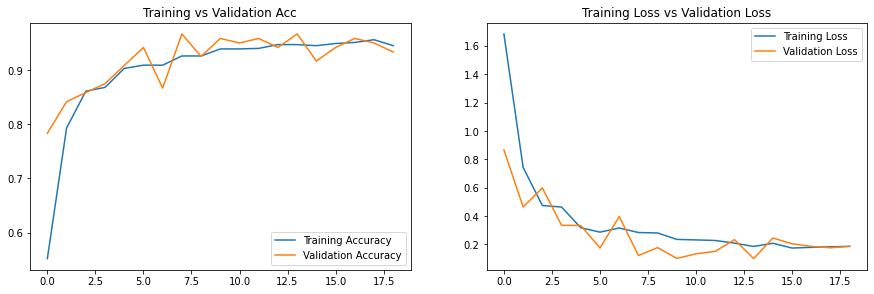

In [23]:

import matplotlib.pyplot as plt

tra_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(tra_acc, label = "Training Accuracy")
plt.plot(val_acc, label = "Validation Accuracy")
plt.legend()
plt.title("Training vs Validation Acc")

tra_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.subplot(2,2,2)
plt.plot(tra_loss, label = "Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.title("Training Loss vs Validation Loss")
plt.show()

In [24]:
pred = model.predict(test_gen)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: attrib() got an unexpected keyword argument 'convert'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: attrib() got an unexpected keyword argument 'convert'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [25]:
ans = model.evaluate(test_gen)

6/6 [==============================] - 4s 610ms/step - loss: 0.3610 - accuracy: 0.9433
